In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

['sans-serif']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


### Baseline

In [23]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,56.47 ± 0.80,85.33 ± 0.30
crop,73.12 ± 0.88,91.50 ± 0.49
euro,64.72 ± 0.88,84.08 ± 0.60
isic,29.39 ± 0.53,40.39 ± 0.55
chest,21.45 ± 0.31,26.75 ± 0.43


In [42]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_mixup_v3.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,57.32 ± 0.82,77.08 ± 0.62
crop,70.58 ± 0.91,90.90 ± 0.50
euro,60.94 ± 0.79,83.14 ± 0.58
isic,29.60 ± 0.55,40.80 ± 0.57
chest,22.64 ± 0.39,26.50 ± 0.43


### Check augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


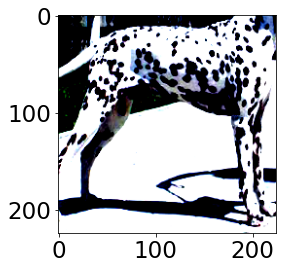

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


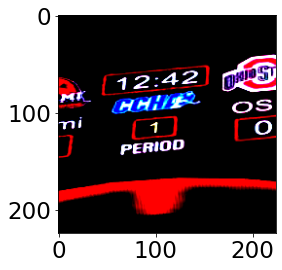

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


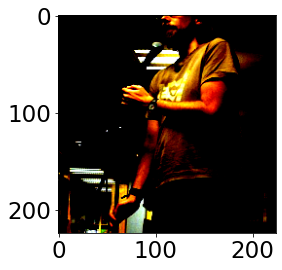

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


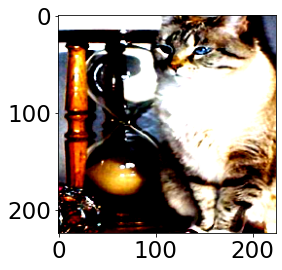

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


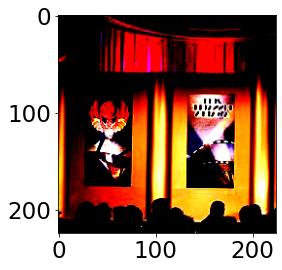

In [36]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_aug_0.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


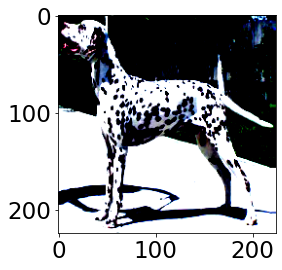

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


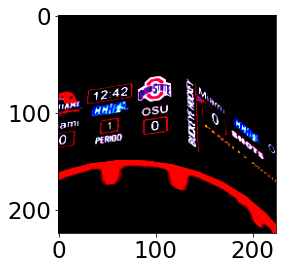

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


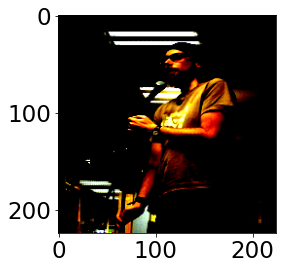

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


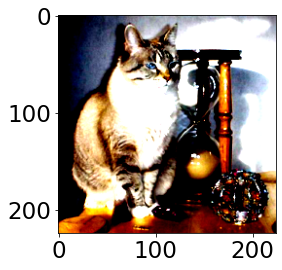

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


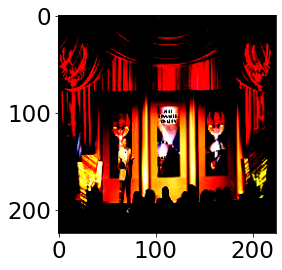

In [37]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_clean_0.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

In [86]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_strong_aug.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,51.45 ± 0.80,75.54 ± 0.60
crop,59.84 ± 0.99,87.33 ± 0.59
euro,54.95 ± 0.82,78.80 ± 0.59
isic,30.11 ± 0.53,43.28 ± 0.59
chest,22.00 ± 0.34,25.91 ± 0.41
